# Importing the packages

In [51]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.multivariate.manova import MANOVA
import seaborn as sns
import statsmodels.api as sm
from seaborn_qqplot import pplot
import math

# Pre-analysis
## Basic variables

In [52]:
mediapipe1Dir = "../datasets/mediapipe_rectangle.csv"
haar1Dir = "../datasets/haar_rectangle.csv"
mtcnn1Dir = "../datasets/mtcnn_rectangle.csv"
mediapipe2Dir = "../datasets/mediapipe_z_pattern.csv"
haar2Dir = "../datasets/haar_z_pattern.csv"
mtcnn2Dir = "../datasets/mtcnn_z_pattern.csv"

dependant = ["total_avg_displacement_abs", "total_avg_displacement_x_abs", "total_avg_displacement_y_abs", "total_avg_displacement_y", "total_avg_displacement_x","fps", "frames_with_no_detection", "area_bb"]
plot_vars = ["total_avg_displacement_abs", "total_avg_displacement_x_abs", "total_avg_displacement_y_abs","fps", "area_bb", "method"]
toTest = ["total_avg_displacement_abs", "total_avg_displacement_x_abs", "total_avg_displacement_y_abs","fps", "area_bb"]

type_dict = {"fps": float, "frames_with_no_detection": float, "area_bb":float, "total_avg_displacement_x":float, "total_avg_displacement_y":float, "total_avg_displacement_x_abs":float, "total_avg_displacement_y_abs":float}

method_dict = {0: "mediapipe", 1: "haar", 2: "mtcnn"}

exp_dict = {0: "rectangular", 1: "z-pattern"}

alpha = 0.05

## Reading the datasets

In [53]:
mediapipe1 = pd.read_csv(mediapipe1Dir)
mediapipe1["method"] = ["mediapipe" for i in range(0,mediapipe1.shape[0])]
haar1 = pd.read_csv(haar1Dir)
haar1["method"] = ["haar" for i in range(0,haar1.shape[0])]
mtcnn1 = pd.read_csv(mtcnn1Dir)
mtcnn1["method"] = ["mtcnn" for i in range(0,mtcnn1.shape[0])]

experiment1 = pd.concat([mediapipe1, haar1, mtcnn1])

experiment1["total_avg_displacement_abs"] = (experiment1["total_avg_displacement_y_abs"]*experiment1["total_avg_displacement_y_abs"] + experiment1["total_avg_displacement_x_abs"]*experiment1["total_avg_displacement_x_abs"])**(1/2)

mediapipe2 = pd.read_csv(mediapipe2Dir)
mediapipe2["method"] = ["mediapipe" for i in range(0,mediapipe2.shape[0])]
haar2 = pd.read_csv(haar2Dir)
haar2["method"] = ["haar" for i in range(0,haar2.shape[0])]
mtcnn2 = pd.read_csv(mtcnn2Dir)
mtcnn2["method"] = ["mtcnn" for i in range(0,mtcnn2.shape[0])]

experiment2 = pd.concat([mediapipe2, haar2, mtcnn2])

experiment2["total_avg_displacement_abs"] = (experiment2["total_avg_displacement_y_abs"]*experiment2["total_avg_displacement_y_abs"] + experiment2["total_avg_displacement_x_abs"]*experiment2["total_avg_displacement_x_abs"])**(1/2)

exp_list = [experiment1, experiment2]

## Take out repeated indexes
for i in range(0, len(exp_list)):
    indexes = [i for i in range(0, exp_list[i].shape[0])]
    exp_list[i].index = indexes

## Asociate adequate type
for i in range(0,len(exp_list)):
    exp_list[i] = exp_list[i].astype(type_dict)
    exp_list[i] = exp_list[i].dropna(0)

/home/pablo/vEnv/ai3/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only


# Initial analysis

## Descriptive statistics

In [54]:
for i in range(0,len(exp_list)):
    print(exp_list[i].describe())

              fps  frames_with_no_detection       area_bb  \
count   75.000000                 75.000000     75.000000   
mean    43.936982                  0.626667   7881.672173   
std     37.288204                  2.148370   2044.492627   
min      9.393969                  0.000000   4924.966330   
25%     14.140580                  0.000000   5224.656139   
50%     25.016127                  0.000000   8479.622995   
75%     79.812684                  0.000000   9841.427907   
max    126.704649                 11.000000  10315.378549   

       total_avg_displacement_x  total_avg_displacement_y  \
count                 75.000000                 75.000000   
mean                  -0.179425                  0.020380   
std                    1.137776                  0.153456   
min                   -5.264563                 -0.308271   
25%                   -0.515525                 -0.060217   
50%                   -0.061303                  0.005291   
75%                    

## Scatter matrix

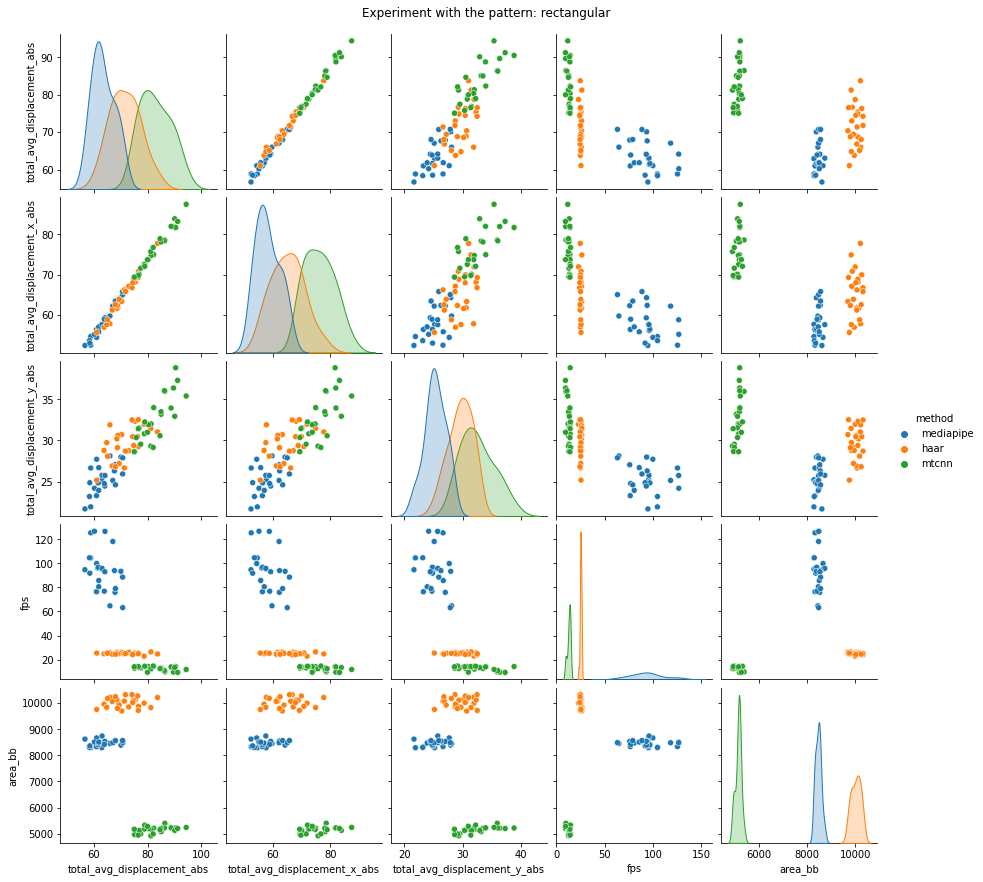

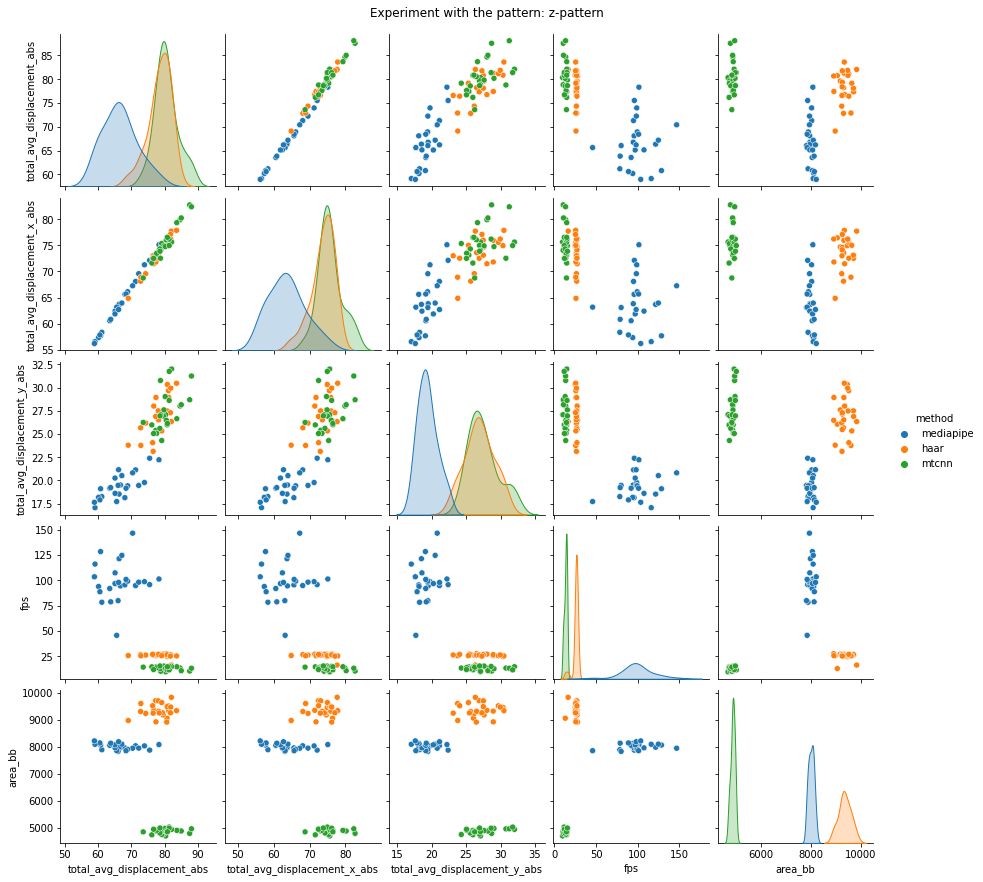

In [55]:

for i in range(0, len(exp_list)):
    scatter = sns.pairplot(exp_list[i][plot_vars], hue="method")
    scatter.fig.suptitle(f"Experiment with the pattern: {exp_dict[i]}")
    scatter.fig.subplots_adjust(top=0.95)

    scatter.savefig(f"scatter_{exp_dict[i]}.png", dpi=200)

## Normality check
### Shapiro-Wilkinson test

A Shapiro-Wilkinson test is performed to check the normality of the sample obtained

In [56]:
for i in range(0, len(exp_list)):
    for j in range(0, 3):
        method = exp_list[i].loc[exp_list[i]["method"] == method_dict[j],dependant]
        #print(method)
        print(f" - Results of the Shapiro-Wilkinson test for the experiment {exp_dict[i]} with the method {method_dict[j]}: \n            {stats.shapiro(method)}")


 - Results of the Shapiro-Wilkinson test for the experiment rectangular with the method mediapipe: 
            ShapiroResult(statistic=0.39995867013931274, pvalue=2.29787588904668e-25)
 - Results of the Shapiro-Wilkinson test for the experiment rectangular with the method haar: 
            ShapiroResult(statistic=0.39731889963150024, pvalue=2.0678866968769213e-25)
 - Results of the Shapiro-Wilkinson test for the experiment rectangular with the method mtcnn: 
            ShapiroResult(statistic=0.4063609838485718, pvalue=2.9720595914376474e-25)
 - Results of the Shapiro-Wilkinson test for the experiment z-pattern with the method mediapipe: 
            ShapiroResult(statistic=0.40104544162750244, pvalue=2.400072572799029e-25)
 - Results of the Shapiro-Wilkinson test for the experiment z-pattern with the method haar: 
            ShapiroResult(statistic=0.3996736407279968, pvalue=2.2718146364475393e-25)
 - Results of the Shapiro-Wilkinson test for the experiment z-pattern with the meth

### Shapiro-Wilkinson test for each variable

In [57]:
for i in range(0, len(exp_list)):
    print(f"***************************** Experiment {i}")
    for j in range(0, 3):
        print(f" ------ Next method: {method_dict[j]}")
        for var in toTest:
            method = exp_list[i].loc[exp_list[i]["method"] == method_dict[j],var]
            #print(method)
            print(f" - Results of the Shapiro-Wilkinson test for the experiment {exp_dict[i]} with the method {method_dict[j]} for the variable {var}: \n            {stats.shapiro(method)}")


***************************** Experiment 0
 ------ Next method: mediapipe
 - Results of the Shapiro-Wilkinson test for the experiment rectangular with the method mediapipe for the variable total_avg_displacement_abs: 
            ShapiroResult(statistic=0.9489805698394775, pvalue=0.23777811229228973)
 - Results of the Shapiro-Wilkinson test for the experiment rectangular with the method mediapipe for the variable total_avg_displacement_x_abs: 
            ShapiroResult(statistic=0.9466679692268372, pvalue=0.2106725126504898)
 - Results of the Shapiro-Wilkinson test for the experiment rectangular with the method mediapipe for the variable total_avg_displacement_y_abs: 
            ShapiroResult(statistic=0.9669914841651917, pvalue=0.5701194405555725)
 - Results of the Shapiro-Wilkinson test for the experiment rectangular with the method mediapipe for the variable fps: 
            ShapiroResult(statistic=0.9422363042831421, pvalue=0.1667049080133438)
 - Results of the Shapiro-Wilkinson 

### QQ-plot

LinAlgError: Singular matrix

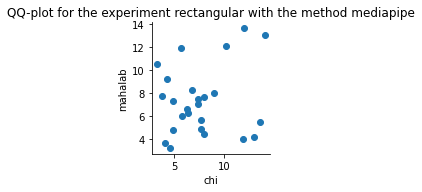

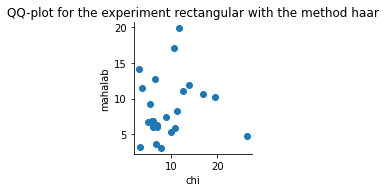

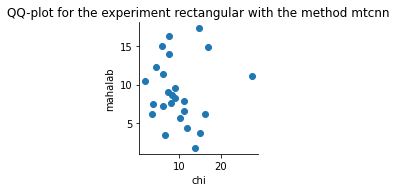

In [58]:
for i in range(0, len(exp_list)):
    m1 = exp_list[i].loc[exp_list[i]["method"] == method_dict[0],dependant]
    cov1 = np.cov(m1.T)
    icov1 = np.linalg.inv(cov1)
    left_term1 = np.dot((m1 - np.mean(m1)),icov1)
    total1 = np.dot(left_term1, (m1 - np.mean(m1)).T)
    mahalab1 = np.diag(total1)
    chi1 = np.random.chisquare(9,  m1.shape[0])
    data1 = pd.DataFrame({"mahalab": mahalab1, "chi": chi1} )
    scatt1 = pplot(x="chi", data=data1, y="mahalab")
    scatt1.set(title=f"QQ-plot for the experiment {exp_dict[i]} with the method {method_dict[0]}")
    scatt1.savefig(f"qqplot_exp{i}_m1.png", dpi=300)

    m2 = exp_list[i].loc[exp_list[i]["method"] == method_dict[1],dependant]
    cov2 = np.cov(m2.T)
    icov2 = np.linalg.inv(cov2)
    left_term2 = np.dot((m2 - np.mean(m2)),icov2)
    total2 = np.dot(left_term2, (m2 - np.mean(m2)).T)
    mahalab2 = np.diag(total2)
    chi2 = np.random.chisquare(9,  m2.shape[0])
    data2 = pd.DataFrame({"mahalab": mahalab2, "chi": chi2} )
    scatt2 = pplot(x="chi", data=data2, y="mahalab")
    scatt2.set(title=f"QQ-plot for the experiment {exp_dict[i]} with the method {method_dict[1]}")
    scatt2.savefig(f"qqplot_exp{i}_m2.png", dpi=300)

    m3 = exp_list[i].loc[exp_list[i]["method"] == method_dict[2],dependant]
    cov3 = np.cov(m3.T)
    icov3 = np.linalg.inv(cov3)
    left_term3 = np.dot((m3 - np.mean(m3)),icov3)
    total3 = np.dot(left_term3, (m3 - np.mean(m3)).T)
    mahalab3 = np.diag(total3)
    chi3 = np.random.chisquare(9,  m3.shape[0])
    data3 = pd.DataFrame({"mahalab": mahalab3, "chi": chi3} )
    scatt3 = pplot(x="chi", data=data3, y="mahalab")
    scatt3.set(title=f"QQ-plot for the experiment {exp_dict[i]} with the method {method_dict[2]}")
    scatt3.savefig(f"qqplot_exp{i}_m3.png", dpi=300)

### QQ plot for individual variables

/home/pablo/vEnv/ai3/lib/python3.7/site-packages/seaborn/axisgrid.py:1242: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


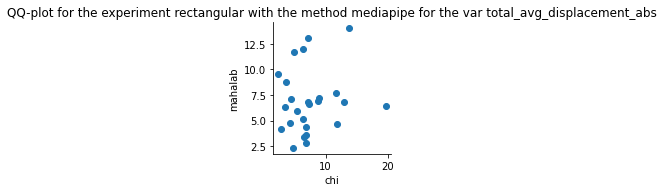

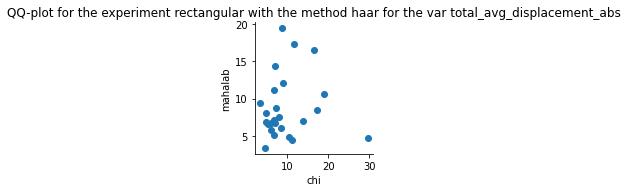

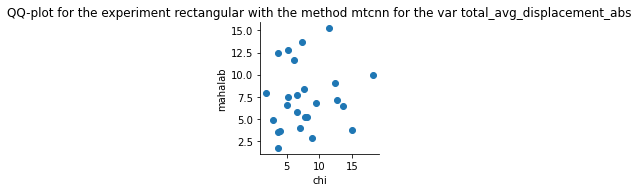

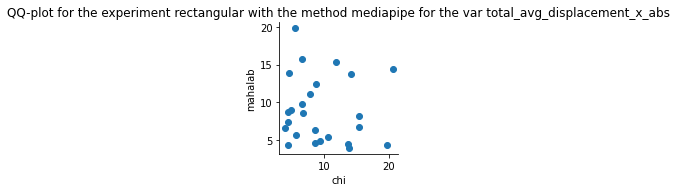

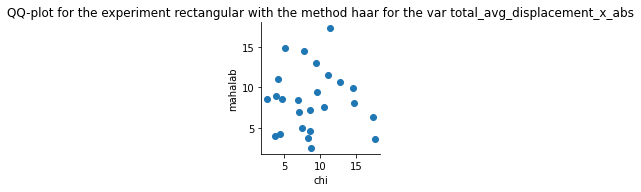

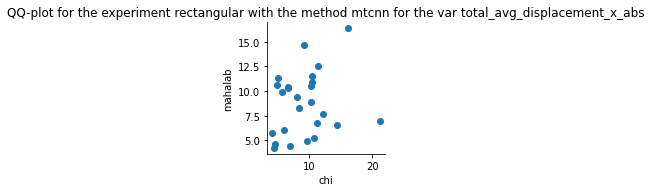

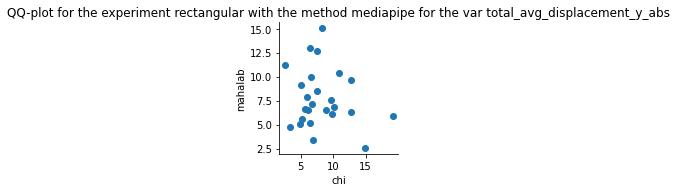

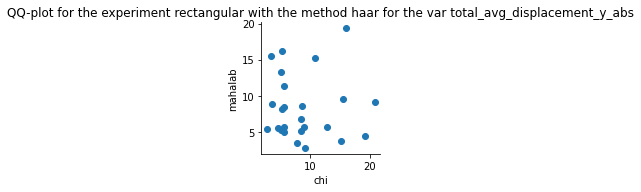

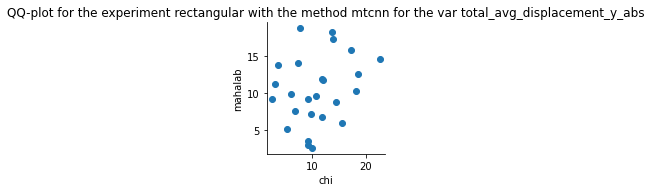

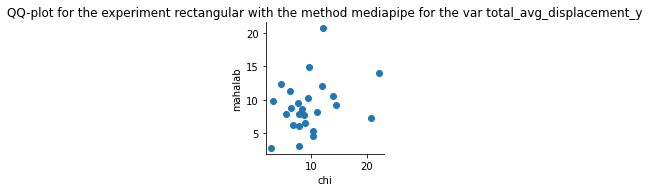

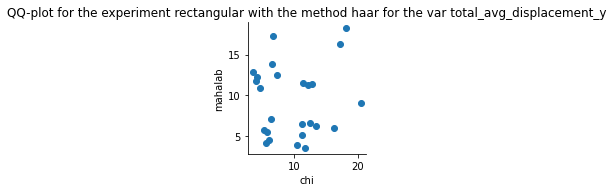

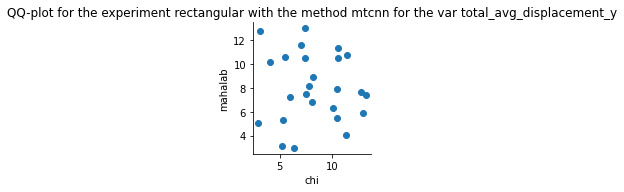

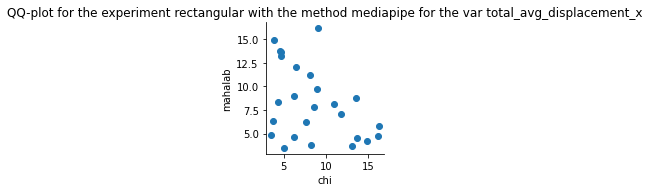

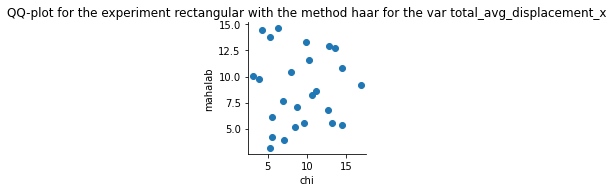

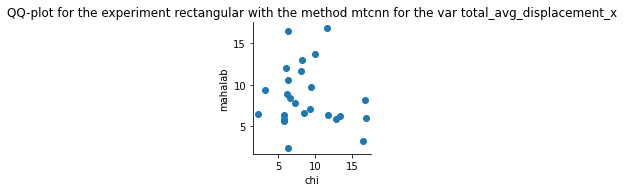

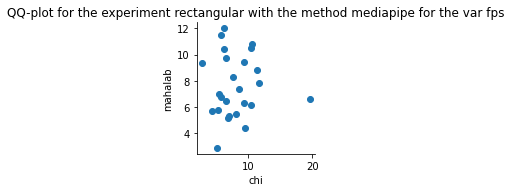

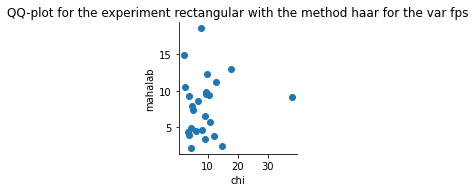

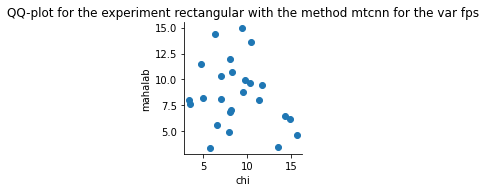

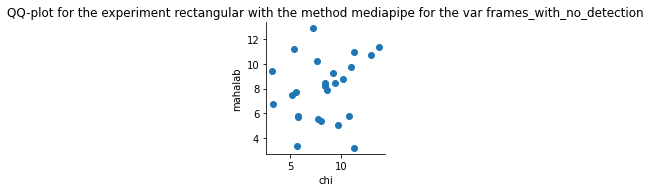

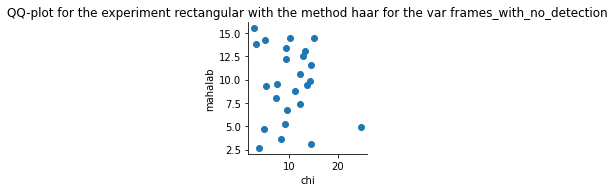

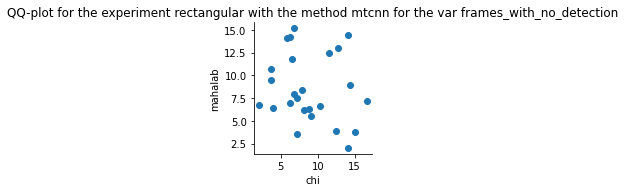

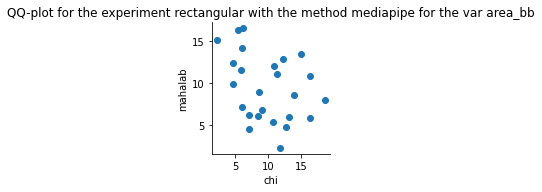

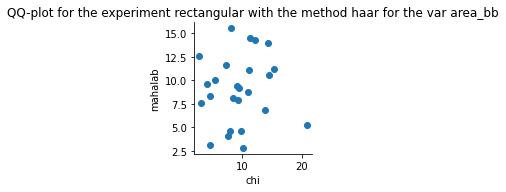

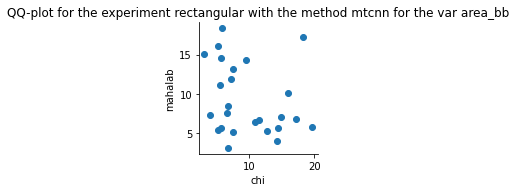

In [ ]:
for i in range(0, len(exp_list)):
    for var in dependant:
        m1 = exp_list[i].loc[exp_list[i]["method"] == method_dict[0],var]
        cov1 = np.cov(m1)
        icov1 = 1/cov1
        left_term1 = np.dot((m1 - np.mean(m1)),icov1)
        mahalab1 = np.dot(left_term1, (m1 - np.mean(m1)))
        chi1 = np.random.chisquare(9,  m1.shape[0])
        data1 = pd.DataFrame({"mahalab": mahalab1, "chi": chi1} )
        scatt1 = pplot(x="chi", data=data1, y="mahalab")
        scatt1.set(title=f"QQ-plot for the experiment {exp_dict[i]} with the method {method_dict[0]} for the var {var}")
        scatt1.savefig(f"qqplot_exp{i}_m1_{var}.png", dpi=300)

        m2 = exp_list[i].loc[exp_list[i]["method"] == method_dict[1],var]
        cov2 = np.cov(m2)
        icov2 = 1/cov2
        left_term2 = np.dot((m2 - np.mean(m2)),icov2)
        mahalab2 = np.dot(left_term2, (m2 - np.mean(m2)))
        chi2 = np.random.chisquare(9,  m2.shape[0])
        data2 = pd.DataFrame({"mahalab": mahalab2, "chi": chi2} )
        scatt2 = pplot(x="chi", data=data2, y="mahalab")
        scatt2.set(title=f"QQ-plot for the experiment {exp_dict[i]} with the method {method_dict[1]} for the var {var}")
        scatt2.savefig(f"qqplot_exp{i}_m2_{var}.png", dpi=300)

        m3 = exp_list[i].loc[exp_list[i]["method"] == method_dict[2],var]
        cov3 = np.cov(m3)
        icov3 = 1/cov3
        left_term3 = np.dot((m3 - np.mean(m3)),icov3)
        mahalab3 = np.dot(left_term3, (m3 - np.mean(m3)))
        chi3 = np.random.chisquare(9,  m3.shape[0])
        data3 = pd.DataFrame({"mahalab": mahalab3, "chi": chi3} )
        scatt3 = pplot(x="chi", data=data3, y="mahalab")
        scatt3.set(title=f"QQ-plot for the experiment {exp_dict[i]} with the method {method_dict[2]} for the var {var}")
        scatt3.savefig(f"qqplot_exp{i}_m3_{var}.png", dpi=300)

## Tests
### MANOVA
Performing MANOVA test

### Performing a Barttlet test between both populations

#### With a Barttlet test we can check whether the covariances can be considered equal. In case they can be considered equal, a test will be performed to check whether the mean can also be considered equal or not in the case of equal covariances. Elsewhere, the test will be performed for the case of unequal covariances matrices.

In [59]:
for i in range(0, len(exp_list)):

    print(f"Method number {i+1}")

    ####################################################################################################
    ## Declare the datasets for each method
    m1 = exp_list[i].loc[exp_list[i]["method"] == method_dict[0],dependant]
    m2 = exp_list[i].loc[exp_list[i]["method"] == method_dict[1],dependant]
    m3 = exp_list[i].loc[exp_list[i]["method"] == method_dict[2],dependant]

    ####################################################################################################
    ## Obtain covariance and other relevant variables
    cov1 = np.cov(m1.T)
    cov2 = np.cov(m2.T)
    cov3 = np.cov(m3.T)

    n1 = m1.shape[0]
    n2 = m2.shape[0]
    n3 = m3.shape[0]
    p = cov1.shape[0]

    Sp12 = ((n1 - 1)*cov1 + (n2 - 1)*cov2)/(n1 + n2 - 2)
    Sp13 = ((n1 - 1)*cov1 + (n3 - 1)*cov3)/(n1 + n3 - 2)
    Sp23 = ((n3 - 1)*cov3 + (n2 - 1)*cov2)/(n3 + n2 - 2)

    equalCov12 = False
    equalCov13 = False
    equalCov23 = False

    ####################################################################################################
    ## Barttlet test
    c12 = 1 - ((2*p^2 + 3*p - 1)/(6*(p + 1))) * ((1/(n1-1)) + (1/(n1-1)) - (1/(n1+n2-1)))
    L12 = c12 * ((n1 + n2 - 2)*np.log(np.linalg.det(Sp12)) - (n1-1)*np.log(np.linalg.det(cov1)) - (n2-1)*np.log(np.linalg.det(cov2)))
    c23 = 1 - ((2*p^2 + 3*p - 1)/(6*(p + 1))) * ((1/(n2-1)) + (1/(n3-1)) - (1/(n3+n2-1)))
    L23 = c23 * ((n2 + n3 - 2)*np.log(np.linalg.det(Sp23)) - (n2-1)*np.log(np.linalg.det(cov2)) - (n3-1)*np.log(np.linalg.det(cov3)))
    c13 = 1 - ((2*p^2 + 3*p - 1)/(6*(p + 1))) * ((1/(n1-1)) + (1/(n3-1)) - (1/(n1+n3-1)))
    L13 = c13 * ((n1 + n3 - 2)*np.log(np.linalg.det(Sp13)) - (n1-1)*np.log(np.linalg.det(cov1)) - (n3-1)*np.log(np.linalg.det(cov3)))
    critical = stats.chi2(df=p*(p+1)/2).ppf(alpha)

    ####################################################################################################
    ## Printing the results
    if (L12 > critical):
        print(f"Rejecting H0 when comparing the methods 1 and 2.")
        equalCov12 = True
    else:
        print(f"Accepting H0 when comparing the methods 1 and 2.")

    if (L23 > critical):
        print(f"Rejecting H0 when comparing the methods 2 and 3.")
        equalCov23 = True
    else:
        print(f"Accepting H0 when comparing the methods 2 and 3.")

    if (L13 > critical):
        print(f"Rejecting H0 when comparing the methods 1 and 3.")
        equalCov13 = True
    else:
        print(f"Accepting H0 when comparing the methods 1 and 3.")
    ####################################################################################################
    ## Check for equal mean vector
    T12_sqr = 0
    T13_sqr = 0
    T23_sqr = 0
    f_dist = stats.f

    ############################################################################
    ## Equal Mean 1-2
    if (equalCov12):
        left_term = np.dot((np.mean(m1) - np.mean(m2)).T,np.linalg.inv(((1/n1)+ (1/n2))*Sp12))
        T12 = np.dot(left_term, (np.mean(m1) - np.mean(m2)).T)
        critical = stats.f.ppf(alpha, p, n1 + n2 - p - 1)
        T12 = math.sqrt(T12)
        critical = c12*critical
        if T12 > critical:
            print(f"Rejecting H0: means cannot be considered equal for m1 and m2")
        else:
            print(f"Aceepting H0: means can be considered equal for m1 and m2")
    else:
        left_term = np.dot((np.mean(m1) - np.mean(m2)),np.linalg.inv((cov1/n1)+ (cov2/n2)))
        T12 = np.dot(left_term, (np.mean(m1) - np.mean(m2)).T)
        T12 = (np.mean(m1) - np.mean(m2)) * np.linalg.inv((cov1/n1).T + (cov2/n2).T) * (np.mean(m1) - np.mean(m2)).T
        critical = stats.chi2(df=p*(p+1)/2).ppf(alpha)
        T12 = T12^(1/2)
        critical = c12*critical
        if T12 > critical:
            print(f"Rejecting H0: means cannot be considered equal for m1 and m2")
        else:
            print(f"Aceepting H0: means can be considered equal for m1 and m2")
    
    ############################################################################
    ## Equal Mean 2-3
    if (equalCov23):
        left_term = np.dot((np.mean(m2) - np.mean(m3)).T,np.linalg.inv(((1/n2)+ (1/n3))*Sp23))
        T23 = np.dot(left_term, (np.mean(m2) - np.mean(m3)).T)
        critical = stats.f.ppf(alpha, p, n1 + n3 - p - 1)
        T23 = math.sqrt(T23)
        critical = c23*critical
        if T23 > critical:
            print(f"Rejecting H0: means cannot be considered equal for m2 and m3")
        else:
            print(f"Aceepting H0: means can be considered equal for m2 and m3")
    else:
        left_term = np.dot((np.mean(m2) - np.mean(m3)),np.linalg.inv((cov2/n2)+ (cov3/n3)))
        T23 = np.dot(left_term, (np.mean(m2) - np.mean(m3)).T)
        critical = stats.chi2(df=p*(p+1)/2).ppf(alpha)
        T23 = math.sqrt(T23)
        critical = c23*critical
        if T23 > critical:
            print(f"Rejecting H0: means cannot be considered equal for m2 and m3")
        else:
            print(f"Aceepting H0: means can be considered equal for m2 and m3")

    ############################################################################
    ## Equal Mean 1-3
    if (equalCov13):
        left_term = np.dot((np.mean(m1) - np.mean(m3)).T,np.linalg.inv(((1/n1)+ (1/n3))*Sp13))
        T13 = np.dot(left_term, (np.mean(m1) - np.mean(m3)).T)
        critical = stats.f.ppf(alpha, p, n1 + n3 - p - 1)
        T13 = math.sqrt(T13)
        critical = c13*critical
        if T13 > critical:
            print(f"Rejecting H0: means cannot be considered equal for m1 and m3")
        else:
            print(f"Aceepting H0: means can be considered equal for m1 and m3")
    else:
        left_term = np.dot((np.mean(m1) - np.mean(m3)),np.linalg.inv((cov1/n1)+ (cov3/n3)))
        T13 = np.dot(left_term, (np.mean(m1) - np.mean(m3)).T)
        critical = stats.chi2(df=p*(p+1)/2).ppf(alpha)
        T13 = math.sqrt(T13)
        critical = c13*critical
        if T13 > critical:
            print(f"Rejecting H0: means cannot be considered equal for m1 and m3")
        else:
            print(f"Aceepting H0: means can be considered equal for m1 and m3")


Method number 1
Rejecting H0 when comparing the methods 1 and 2.
Rejecting H0 when comparing the methods 2 and 3.
Rejecting H0 when comparing the methods 1 and 3.
Rejecting H0: means cannot be considered equal for m1 and m2
Rejecting H0: means cannot be considered equal for m2 and m3
Rejecting H0: means cannot be considered equal for m1 and m3
Method number 2
Rejecting H0 when comparing the methods 1 and 2.
Rejecting H0 when comparing the methods 2 and 3.
Accepting H0 when comparing the methods 1 and 3.
Rejecting H0: means cannot be considered equal for m1 and m2
Rejecting H0: means cannot be considered equal for m2 and m3


/home/pablo/vEnv/ai3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
/home/pablo/vEnv/ai3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log
/home/pablo/vEnv/ai3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log
/home/pablo/vEnv/ai3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


LinAlgError: Singular matrix

## Tests for individual variables
### T-test

In [61]:
n = exp_list[0].shape[0]
p = 1
alpha = 0.05

critical = (p*(n-1)/(n-p)) * stats.f.ppf(1 - alpha, n-1, n-p)
print(f" * Critical value is: {critical}")

for i in range(0, len(exp_list)):
    print(f"Method number {i+1}")
    for var in toTest:
        print(f"----------- Test for the variable {var} -------------")
        sample1 = exp_list[i].loc[exp_list[i]["method"] == method_dict[0],var]
        sample2 = exp_list[i].loc[exp_list[i]["method"] == method_dict[1],var]
        sample3 = exp_list[i].loc[exp_list[i]["method"] == method_dict[2],var]
        sample1.index = [i for i in range(0, sample1.shape[0])]
        sample2.index = [i for i in range(0, sample2.shape[0])]
        sample3.index = [i for i in range(0, sample3.shape[0])]
        mu1 = np.mean(sample1)
        mu2 = np.mean(sample2)
        mu3 = np.mean(sample3)

        ###########################################
        # Testing methods 1 and 2
        dif12 = sample1 - sample2
        Sd12 = np.cov(dif12)
        temp = np.dot(dif12.T, (Sd12/dif12.shape[0])**(-1))
        T12_sqr = np.dot(temp, dif12.T)
        print(f" -- Test parameter for variable {var} between 1 and 2: {T12_sqr}")
        if T12_sqr > critical:
            print("         - Rejection H0 -> means are different.")
        else:
            print("         - Accepting H0 -> no evidence to rejecte the null hypothesis.")


        ###########################################
        # Testing methods 2 and 3

        dif23 = sample2 - sample3
        Sd23 = np.cov(dif23)
        temp = np.dot(dif23.T, (Sd23/dif23.shape[0])**(-1))
        T23_sqr = np.dot(temp, dif23.T)
        print(f" -- Test parameter for variable {var} between 2 and 3: {T23_sqr}")
        if T23_sqr > critical:
            print("         - Rejection H0 -> means are different.")
        else:
            print("         - Accepting H0 -> no evidence to rejecte the null hypothesis.")


        ###########################################
        # Testing methods 1 and 3

        dif13 = sample1 - sample3
        Sd13 = np.cov(dif13)
        temp = np.dot(dif13.T, (Sd13/dif13.shape[0])**(-1))
        T13_sqr = np.dot(temp, dif13.T)
        print(f" -- Test parameter for variable {var} between 1 and 3: {T13_sqr}")
        if T13_sqr > critical:
            print("         - Rejection H0 -> means are different.")
        else:
            print("         - Accepting H0 -> no evidence to rejecte the null hypothesis.")


        print("\n\n\n")

 * Critical value is: 1.469451005833426
Method number 1
----------- Test for the variable total_avg_displacement_abs -------------
 -- Test parameter for variable total_avg_displacement_abs between 1 and 2: 1389.056654793122
         - Rejection H0 -> means are different.
 -- Test parameter for variable total_avg_displacement_abs between 2 and 3: 2015.4256759134496
         - Rejection H0 -> means are different.
 -- Test parameter for variable total_avg_displacement_abs between 1 and 3: 3634.890906966997
         - Rejection H0 -> means are different.




----------- Test for the variable total_avg_displacement_x_abs -------------
 -- Test parameter for variable total_avg_displacement_x_abs between 1 and 2: 1153.0961204708062
         - Rejection H0 -> means are different.
 -- Test parameter for variable total_avg_displacement_x_abs between 2 and 3: 2029.649507732459
         - Rejection H0 -> means are different.
 -- Test parameter for variable total_avg_displacement_x_abs between 1 a

### Confidence intervals

In [64]:
n = exp_list[0].shape[0]
p = 1
alpha = 0.05
t_statistic = stats.t.ppf(1-alpha/2, n-1)

for i in range(0, len(exp_list)):
    print(f"Method number {i+1}")
    for var in toTest:
        print(f"----------- Test for the variable {var} -------------")
        sample1 = exp_list[i].loc[exp_list[i]["method"] == method_dict[0],var]
        sample2 = exp_list[i].loc[exp_list[i]["method"] == method_dict[1],var]
        sample3 = exp_list[i].loc[exp_list[i]["method"] == method_dict[2],var]
        sample1.index = [i for i in range(0, sample1.shape[0])]
        sample2.index = [i for i in range(0, sample2.shape[0])]
        sample3.index = [i for i in range(0, sample3.shape[0])]

        ###########################################
        # Testing methods 1 and 2
        lowerBound = np.mean(sample1) + t_statistic*np.sqrt(np.cov(sample1)/n)
        upperBound = np.mean(sample1) - t_statistic*np.sqrt(np.cov(sample1)/n)
        print(f"        * Confidence interval for method {method_dict[0]}:  [ {lowerBound}, {upperBound}]")

        lowerBound = np.mean(sample2) + t_statistic*np.sqrt(np.cov(sample2)/n)
        upperBound = np.mean(sample2) - t_statistic*np.sqrt(np.cov(sample2)/n)
        print(f"        * Confidence interval for method {method_dict[1]}:  [ {lowerBound}, {upperBound}]")

        lowerBound = np.mean(sample3) + t_statistic*np.sqrt(np.cov(sample3)/n)
        upperBound = np.mean(sample3) - t_statistic*np.sqrt(np.cov(sample3)/n)
        print(f"        * Confidence interval for method {method_dict[2]}:  [ {lowerBound}, {upperBound}]")


        print("\n\n\n")

Method number 1
----------- Test for the variable total_avg_displacement_abs -------------
        * Confidence interval for method mediapipe:  [ 64.3789283385625, 62.49216193451854]
        * Confidence interval for method haar:  [ 72.87733524109919, 70.28207128529371]
        * Confidence interval for method mtcnn:  [ 84.2338035285917, 81.64575056927467]




----------- Test for the variable total_avg_displacement_x_abs -------------
        * Confidence interval for method mediapipe:  [ 59.074394222599636, 57.210238825200975]
        * Confidence interval for method haar:  [ 66.43636152600814, 63.807966687413575]
        * Confidence interval for method mtcnn:  [ 77.44153963634189, 75.0588291842267]




----------- Test for the variable total_avg_displacement_y_abs -------------
        * Confidence interval for method mediapipe:  [ 25.722009027873543, 24.911919862716953]
        * Confidence interval for method haar:  [ 30.098290458000992, 29.164508746385255]
        * Confidence i